In [294]:
import csv 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd
import heapq


In [295]:
sns.set('talk')

In [296]:
with open('life-expectancy-vs-gdp-per-capita.csv',newline='') as f:         #Ouverture du fichier CSV
    tableau=[]
    lire=csv.reader(f)                            #chargement des lignes du fichier csv
    print('',end='\n')
    print('Affichage des lignes du tableau',end='\n')
    for ligne in lire:                            #Pour chaque ligne... 
        #print(ligne, end='\n')                    #...affichage de la ligne dans la console ...
        tableau.append(ligne)                     #...on ajoute la ligne dans la liste ...



Affichage des lignes du tableau


In [297]:
del tableau[1]


In [298]:
for i in reversed(range(1,len(tableau))):
    k=tableau[i][2]
    k=int(k)
    if(k!=2015):
        del tableau[i]
tableau

[['Entity',
  'Code',
  'Year',
  'Total population (Gapminder, HYDE & UN)',
  'Continent',
  'Life expectancy',
  'Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'],
 ['Afghanistan', 'AFG', '2015', '34414000', 'Asia', '63.377', '1928'],
 ['Africa', '', '2015', '1182439040', '', '61.607', '4684'],
 ['Akrotiri and Dhekelia', 'OWID_AKD', '2015', '', 'Asia', '', ''],
 ['Albania', 'ALB', '2015', '2891000', 'Europe', '78.025', '10947'],
 ['Algeria', 'DZA', '2015', '39728000', 'Africa', '76.09', '13024'],
 ['American Samoa', 'ASM', '2015', '56000', 'Oceania', '73.588', ''],
 ['Americas', '', '2015', '', '', '76.44286453', ''],
 ['Andorra', 'AND', '2015', '78000', 'Europe', '83.073', ''],
 ['Angola', 'AGO', '2015', '27884000', 'Africa', '59.398', '8631'],
 ['Anguilla', 'AIA', '2015', '14000', 'North America', '81.332', ''],
 ['Antarctica', 'ATA', '2015', '', 'Antarctica', '', ''],
 ['Antigua and Barbuda',
  'ATG',
  '2015',
  '94000',
  'North America',


In [299]:
gdp=[]
life_expectancy=[]
labels=[]
population=[]
population_plot=[]
continent =[]
color=[]
for i in range (len(tableau)):
    gdp.append(tableau[i][6])
    labels.append(tableau[i][0])
    life_expectancy.append(tableau[i][5])
    population.append(tableau[i][3])
    continent.append(tableau[i][4])
print(len(gdp),len(life_expectancy),len(labels),len(population))

for i in reversed(range(1,len(gdp))):
    k=tableau[i][6]
    l=tableau[i][5]
    m=tableau[i][1]
    n=tableau[i][4]
    if(k=='' or l=='' or m=='' or n ==''):
        del gdp[i]
        del life_expectancy[i]
        del labels[i]
        del population[i]
        del continent[i]

for i in range(1,len(gdp)):
    if (continent[i]== 'Europe'):
        color.append("red")
    if (continent[i]== 'Asia'):
        color.append("blue")
    if (continent[i]== 'Africa'):
        color.append("green")
    if (continent[i]== 'North America'):
        color.append("purple")
    if (continent[i]=='South America'):
        color.append("orange")
    if (continent[i]== 'Oceania'):
        color.append("beige")
    if (continent[i]== 'Antarctica'):
        color.append("brown")


303 303 303 303


In [300]:
best_countries=[]
best_lifeExpt=[]
best_GDP=[]
dataFrameG=[]
for i in range(1,len(life_expectancy)):
    gdp[i]=int(gdp[i])
    life_expectancy[i]=float(life_expectancy[i])
    population_plot.append(int(population[i])/1000000)
print(len(gdp),len(life_expectancy),len(color),len(population_plot))

lifexpt_mean=np.mean(life_expectancy[1:])
std_lifexpt=np.std(life_expectancy[1:])
stand_abobeMean=lifexpt_mean+std_lifexpt


del life_expectancy[0]
del labels[0]
del gdp[0]

for i in range(len(life_expectancy)):
    if (life_expectancy[i]>stand_abobeMean):
        best_countries.append(labels[i])
        best_lifeExpt.append(life_expectancy[i])
        best_GDP.append(gdp[i])
    
        
dataFrameG=np.vstack(( best_countries,best_lifeExpt,best_GDP))
Test=np.transpose(dataFrameG)
columns = ['Country','Life Expectancy','GDP']
dg = pd.DataFrame(data=Test,columns=columns)

dg.style.format("{:.20}")


167 167 166 166


,Country,Life Expectancy,GDP
0,Australia,82.794,44336
1,Austria,81.182,44845
2,Belgium,80.969,39531
3,Canada,82.026,42844
4,Cyprus,80.35,25903
5,Denmark,80.475,44939
6,Finland,81.196,37920
7,France,82.224,38448
8,Germany,80.77,46426
9,Greece,81.548,24545


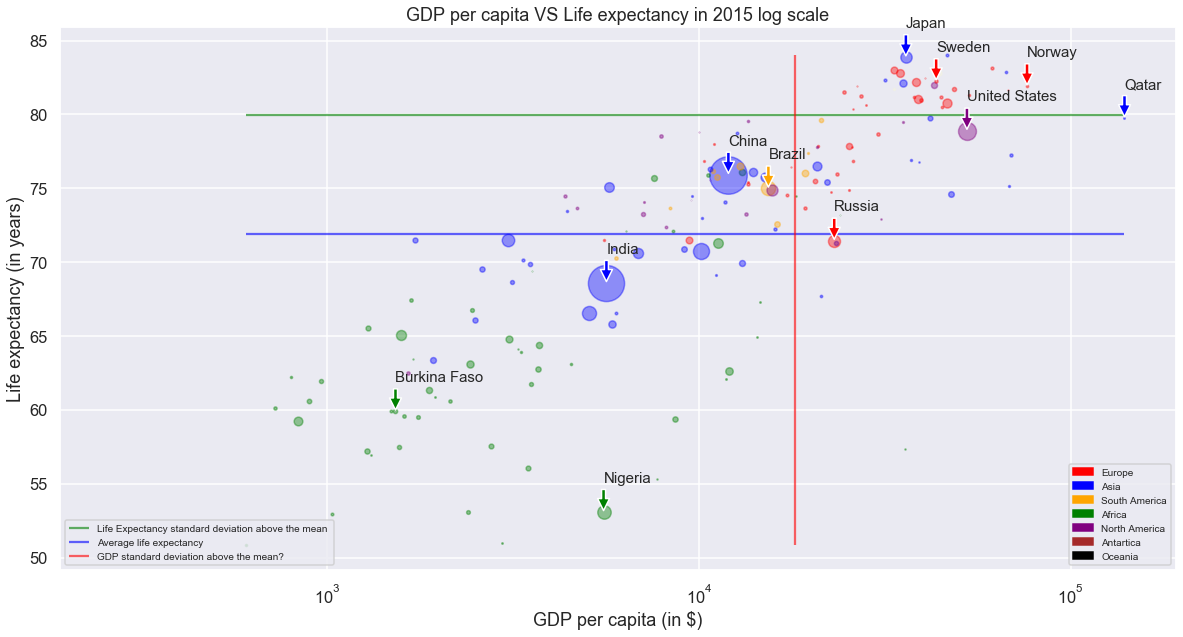

In [301]:
#population
fig,ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_xscale("log")


for i in range((len(gdp))): 
    ax.scatter(gdp[i],life_expectancy[i],c=color[i],s=population_plot[i],alpha=0.4)
    if (labels[i]=='China' or labels[i]=='Japan'or labels[i]=='Sweden' or labels[i]=='Norway'
        or labels[i]=='Nigeria' or labels[i]=='Burkina Faso' or labels[i]=='Qatar'or labels[i]=='India'
        or labels[i]=='Brazil'or labels[i]=='United States'or labels[i]=='Russia'):
        ax.annotate(labels[i],(gdp[i], life_expectancy[i]),xytext=(gdp[i],life_expectancy[i]+2),fontsize=15, arrowprops=dict(facecolor=color[i], shrink=0.05))
   
ax.hlines(stand_abobeMean,np.min(gdp),np.max(gdp), color='green',alpha=0.6,label='Life Expectancy standard deviation above the mean ')
ax.hlines(np.mean(life_expectancy),np.min(gdp),np.max(gdp), color='blue',alpha=0.6,label='Average life expectancy')
ax.vlines(np.mean(gdp),(np.min(life_expectancy)),np.max(life_expectancy), color='red',alpha=0.6,label='GDP standard deviation above the mean?')



ax.set_xlabel('GDP per capita (in $)')
ax.set_ylabel('Life expectancy (in years)')
ax.set_title('GDP per capita VS Life expectancy in 2015 log scale')
leg1=ax.legend(prop={"size":10},loc='lower left')


red_patch = mpatches.Patch(color='red', label='Europe')
blue_patch = mpatches.Patch(color='blue', label='Asia')
orange_patch = mpatches.Patch(color='orange', label='South America')
green_patch = mpatches.Patch(color='green', label='Africa')
purple_patch = mpatches.Patch(color='purple', label='North America')
brown_patch = mpatches.Patch(color='brown', label='Antartica')
beige_patch = mpatches.Patch(color='black', label='Oceania')

leg2=ax.legend(handles=[red_patch,blue_patch,orange_patch,green_patch,purple_patch,brown_patch,beige_patch],prop={"size":10},loc='lower right')

ax.add_artist(leg1)
del population[0]

In [302]:
# e High life but low gdp
mix_countries=[]
high_lifeExpt=[]
low_GDP=[]
dataFrameM=[]
lim_gdp=9000
lim_exp=70
for i in range((len(gdp))):
    if (gdp[i]<lim_gdp and life_expectancy[i]>lim_exp):
        mix_countries.append(labels[i])
        low_GDP.append(gdp[i])
        high_lifeExpt.append(life_expectancy[i])
        
        
dataFrameM=np.vstack(( mix_countries,low_GDP,high_lifeExpt))
Test=np.transpose(dataFrameM)
columns = ['Country','GDP','Life Expectancy',]
df = pd.DataFrame(data=Test,columns=columns)

df.style.format("{:.20}")



,Country,GDP,Life Expectancy
0,Bangladesh,3068,71.514
1,Bolivia,5969,70.277
2,Cape Verde,6358,72.117
3,Cuba,7889,78.561
4,El Salvador,8163,72.412
5,Guatemala,7055,73.25
6,Honduras,4352,74.495
7,Jamaica,7115,74.098
8,Kyrgyzstan,5910,70.876
9,Libya,8514,72.121


['India', 'Russia']

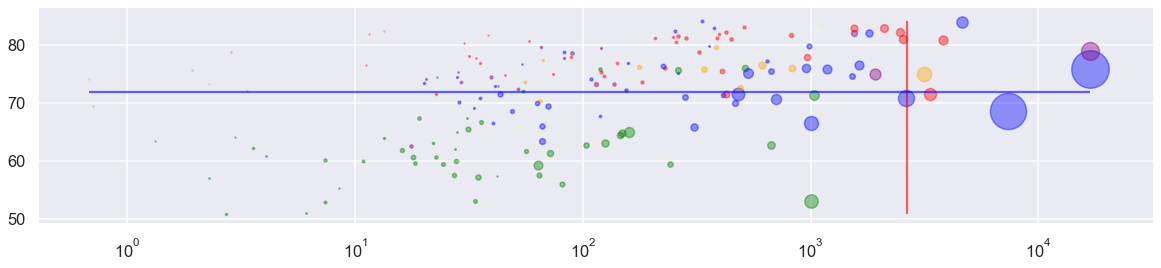

In [303]:
#f 
inequal_country=[]
inequal_lifeExp=[]
highLE_LowGDP_C=[]
highLE_LowGDP=[]
fig2,ax2 = plt.subplots(1, 1, figsize=(20, 4))
ax2.set_xscale("log")
total_gdp=[]
treshold_e=40

for i in range(len(gdp)):
    total_gdp.append(int(gdp[i])*int(population[i])/1000000000)
test=np.std(total_gdp)+np.mean(total_gdp)
for i in range((len(gdp))): 
    ax2.scatter(total_gdp[i],life_expectancy[i],c=color[i],s=population_plot[i],alpha=0.4)

for i in range(len(life_expectancy)):
    if (life_expectancy[i]<np.mean(life_expectancy) and total_gdp[i]>test):
        inequal_country.append(labels[i])
        inequal_lifeExp.append(life_expectancy[i])
        
#ax2.hlines(stand_abobeMean,np.min(gdp),np.max(gdp), color='green',alpha=0.6,label='Life Expectancy standard deviation above the mean ')
#ax2.hlines(np.mean(life_expectancy),np.min(gdp),np.max(gdp), color='blue',alpha=0.6,label='Average life expectancy')
ax2.vlines((np.mean(total_gdp)+np.std(total_gdp)),(np.min(life_expectancy)),np.max(life_expectancy), color='red',alpha=0.6,label='GDP standard deviation above the mean? + One std')
ax2.hlines(np.mean(life_expectancy),np.min(total_gdp),np.max(total_gdp), color='blue',alpha=0.6,label='Average life expectancy')
inequal_country

In [304]:
#Part 2
with open('suicide-rate.csv',newline='') as f:         #Ouverture du fichier CSV
    tableau=[]
    lire=csv.reader(f)                            #chargement des lignes du fichier csv
    print('',end='\n')
    print('Affichage des lignes du tableau',end='\n')
    for ligne in lire:                            #Pour chaque ligne... 
        #print(ligne, end='\n')                    #...affichage de la ligne dans la console ...
        tableau.append(ligne)  

del tableau[0]#...on ajoute la ligne dans la liste ...

for i in reversed(range(1,len(tableau))):
    k=tableau[i][2]
    k=int(k)
    if(k!=2015):
        del tableau[i]

labels_h=[]
suicidal_rate=[]

color=[]
for i in range (len(tableau)):
    labels_h.append(tableau[i][0])
    suicidal_rate.append(tableau[i][3])

for i in reversed(range(1,len(labels_h))):
    k=tableau[i][0]
    l=tableau[i][3]
    if(k=='' or l=='' ):
        del labels_h[i]
        del suicidal_rate[i]
print(len(labels_h))    
countries=[]
most_suicide=heapq.nlargest(100, suicidal_rate)
for i in range (len(tableau)):
    for j in range (len(most_suicide)):
        if suicidal_rate[i]==most_suicide[j]:
            countries.append(labels_h[i])
            



Affichage des lignes du tableau
186


In [305]:
dataFrameZ=np.vstack((labels_h,suicidal_rate))
Test=np.transpose(dataFrameZ)
columns = ['Country','Suicidal rate',]
df = pd.DataFrame(data=Test,columns=columns)
df['Suicidal rate']=df['Suicidal rate'].astype('float64')
df.style.format("{:.20}");

In [306]:
df['Suicidal rate'].mean()

9.379383281590961

In [307]:
rich_countries=pd.concat([df.loc[df['Country']=='Norway'],df.loc[df['Country']=='Sweden'],
                         df.loc[df['Country']=='United States'],df.loc[df['Country']=='Japan'],
                         df.loc[df['Country']=='China'],df.loc[df['Country']=='South Korea'],
                         df.loc[df['Country']=='Canada']]).sort_values(by=['Suicidal rate'])


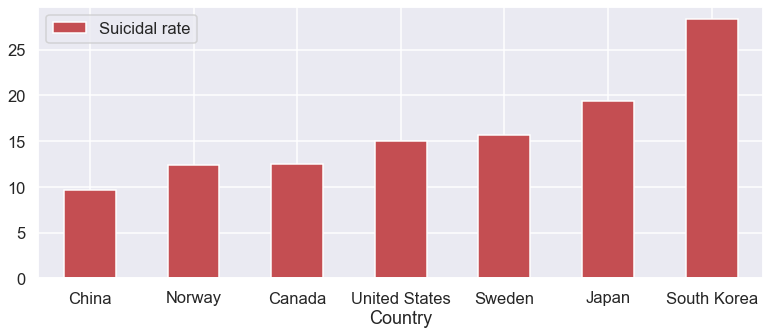

In [308]:
 rich_countries.plot.bar(x='Country',y='Suicidal rate',rot=0,figsize=(13,5),color='r')

In [309]:
poor_countries=pd.concat([df.loc[df['Country']=='Burkina Faso'],df.loc[df['Country']=='Yemen'],
                         df.loc[df['Country']=='Syria'],df.loc[df['Country']=='Mali'],
                         df.loc[df['Country']=='Somalia'],df.loc[df['Country']=='Chad'],df.loc[df['Country']=='Sudan']]).sort_values(by=['Suicidal rate'])



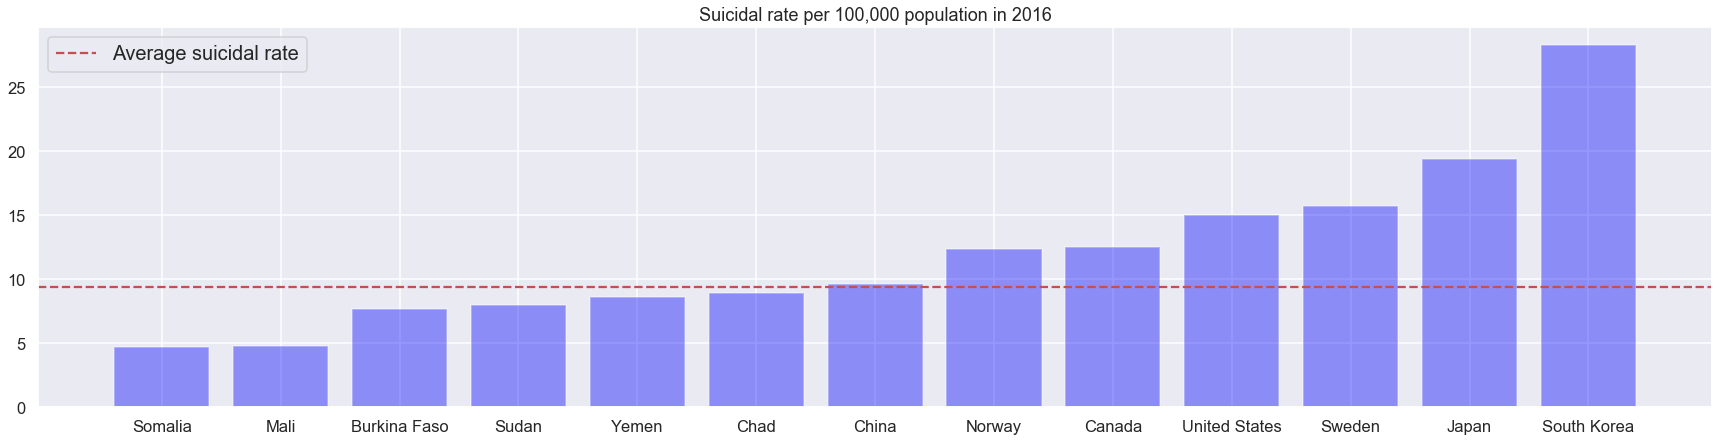

In [310]:
fig,ax = plt.subplots(1, 1, figsize=(30, 7))
mix_countries=pd.concat([rich_countries,poor_countries]).sort_values(by=['Suicidal rate'])
ax.bar(mix_countries['Country'],mix_countries['Suicidal rate'],color='blue',alpha=0.4)
ax.axhline(df['Suicidal rate'].mean(), color='r', linestyle='--',label='Average suicidal rate')
ax.set_title('Suicidal rate per 100,000 population in 2016')
leg1=ax.legend(prop={"size":20},loc='upper left')
plt.show()

In [311]:
#Create another data frame: we use it to correlate the data from all the datasets
dataframeP=np.vstack((labels,life_expectancy,gdp))
Test=np.transpose(dataframeP)
columns = ['Country','Life Expectancy','GDP']
dp= pd.DataFrame(data=Test,columns=columns)
last_df = pd.merge(dp,mix_countries, how='inner', on=['Country', 'Country'])
last_df.style.format("{:.20}")

,Country,Life Expectancy,GDP,Suicidal rate
0,Burkina Faso,59.919,1527,7.7000000000000001776
1,Canada,82.026,42844,12.5
2,Chad,53.137,2387,8.9000000000000003553
3,China,75.928,12002,9.5999999999999996447
4,Japan,83.879,36030,19.399999999999998579
5,Mali,57.509,1563,4.7999999999999998224
6,Norway,81.912,76305,12.400000000000000355
7,South Korea,82.1,35316,28.300000000000000711
8,Sudan,64.429,3723,8.0
9,Sweden,82.251,43464,15.699999999999999289


In [312]:
#Part 2
with open('global-hunger-index.csv',newline='') as f:      
    tableau=[]
    lire=csv.reader(f)                            
    print('',end='\n')
    for ligne in lire:                           
        tableau.append(ligne)                     
    
del tableau[0]

for i in reversed(range(1,len(tableau))):
    k=tableau[i][2]
    k=int(k)
    if(k!=2018):
        del tableau[i]

labels_2=[]
hunger_rate=[]

for i in range (len(tableau)):
    labels_2.append(tableau[i][0])
    hunger_rate.append(tableau[i][3])

for i in reversed(range(1,len(labels_2))):
    k=tableau[i][0]
    l=tableau[i][3]
    if(k=='' or l=='' ):
        del labels_2[i]
        del hunger_rate[i]
        
countries=[]
most_hunger=heapq.nlargest(100, hunger_rate)
for i in range (len(tableau)):
    for j in range (len(most_hunger)):
        if suicidal_rate[i]==most_hunger[j]:
            countries.append(labels_2[i])

In [313]:
dataFrameH=np.vstack((labels_2,hunger_rate))
Test=np.transpose(dataFrameH)
columns = ['Country','Hunger rate',]
dh = pd.DataFrame(data=Test,columns=columns)
dh['Hunger rate']=dh['Hunger rate'].astype('float64')
dh.style.format("{:.20}");

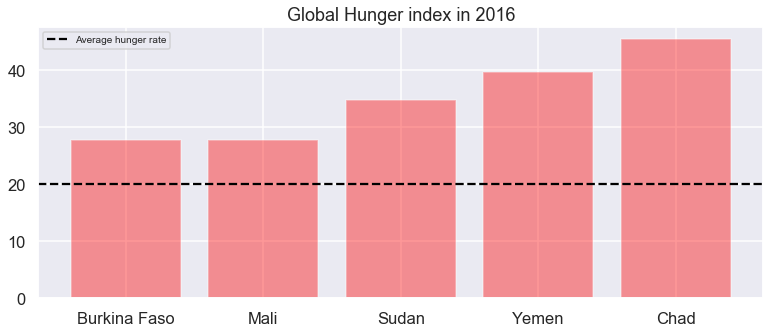

In [314]:
test2= poor_countries=pd.concat([dh.loc[dh['Country']=='Burkina Faso'],dh.loc[dh['Country']=='Yemen'],
                         dh.loc[dh['Country']=='Syria'],dh.loc[dh['Country']=='Mali'],
                         dh.loc[dh['Country']=='Somalia'],dh.loc[dh['Country']=='Chad'],dh.loc[dh['Country']=='Sudan']]).sort_values(by=['Hunger rate'])


high_hunger_countries=dh.nlargest(6,'Hunger rate')
fig,ax = plt.subplots(1, 1, figsize=(13, 5))
ax.bar(test2['Country'],test2['Hunger rate'],color='red',alpha=0.4)
ax.axhline(dh['Hunger rate'].mean(), color='black', linestyle='--',label='Average hunger rate')
ax.set_title('Global Hunger index in 2016')
leg1=ax.legend(prop={"size":10},loc='upper left')
plt.show()

In [315]:
last_df.sort_values(by=['GDP']) #This dataframe is a mix of poor and rich countries that we will compare using all the datasets

,Country,Life Expectancy,GDP,Suicidal rate
3,China,75.928,12002,9.6
0,Burkina Faso,59.919,1527,7.7
5,Mali,57.509,1563,4.8
2,Chad,53.137,2387,8.9
11,Yemen,66.085,2496,8.6
7,South Korea,82.1,35316,28.3
4,Japan,83.879,36030,19.4
8,Sudan,64.429,3723,8.0
1,Canada,82.026,42844,12.5
9,Sweden,82.251,43464,15.7


In [316]:
g=last_df['GDP'].to_numpy()
s_rate=last_df['Suicidal rate'].to_numpy()
gdp= [int(gdp) for gdp in g]
labels=[]
for i in range(12):
    labels.append(last_df['Country'][i])

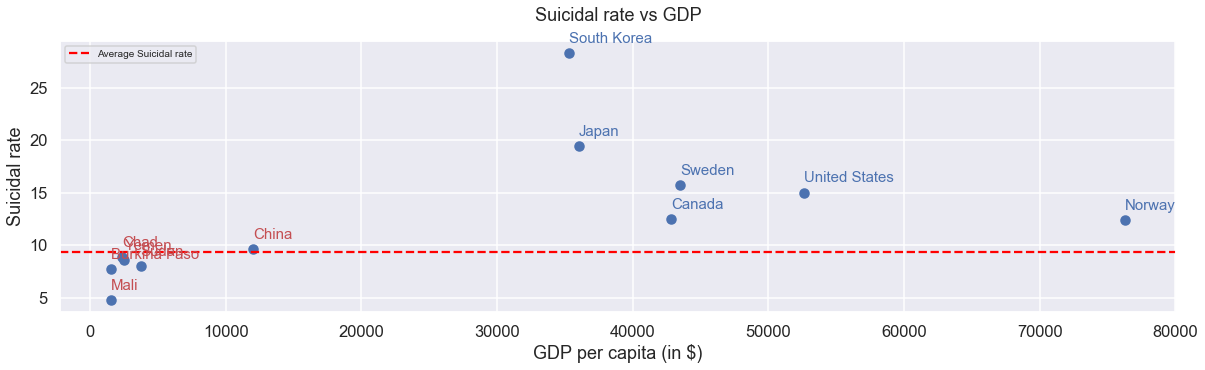

In [317]:
fig,ax = plt.subplots(1, 1, figsize=(20, 5))
ax.scatter(ggg,s,color='b')
ax.axhline(df['Suicidal rate'].mean(), color='red', linestyle='--',label='Average Suicidal rate')
for i in range (12):
    if s_rate[i]<12:
         ax.annotate(labels[i],(gdp[i], s_rate[i]),xytext=(gdp[i],s_rate[i]+1),fontsize=15,color='r')
    else:
        ax.annotate(lab[i],(gdp[i], s_rate[i]),xytext=(gdp[i],s[i]+1),fontsize=15,color='b')
ax.set_title('Suicidal rate vs GDP')
ttl = ax.title
ttl.set_position([.5, 1.05])
ax.set_xlabel('GDP per capita (in $)')
ax.set_ylabel('Suicidal rate')
leg1=ax.legend(prop={"size":10},loc='upper left')
plt.show()